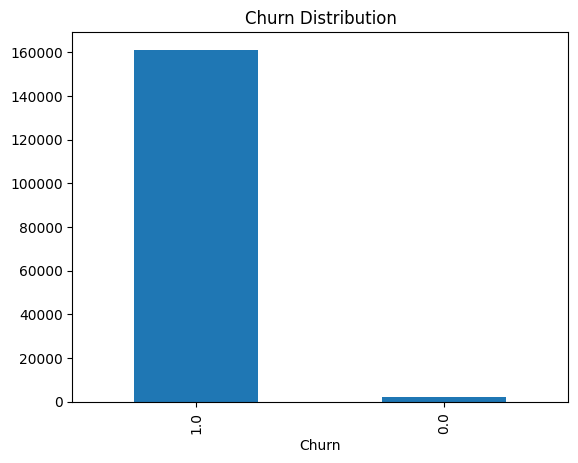

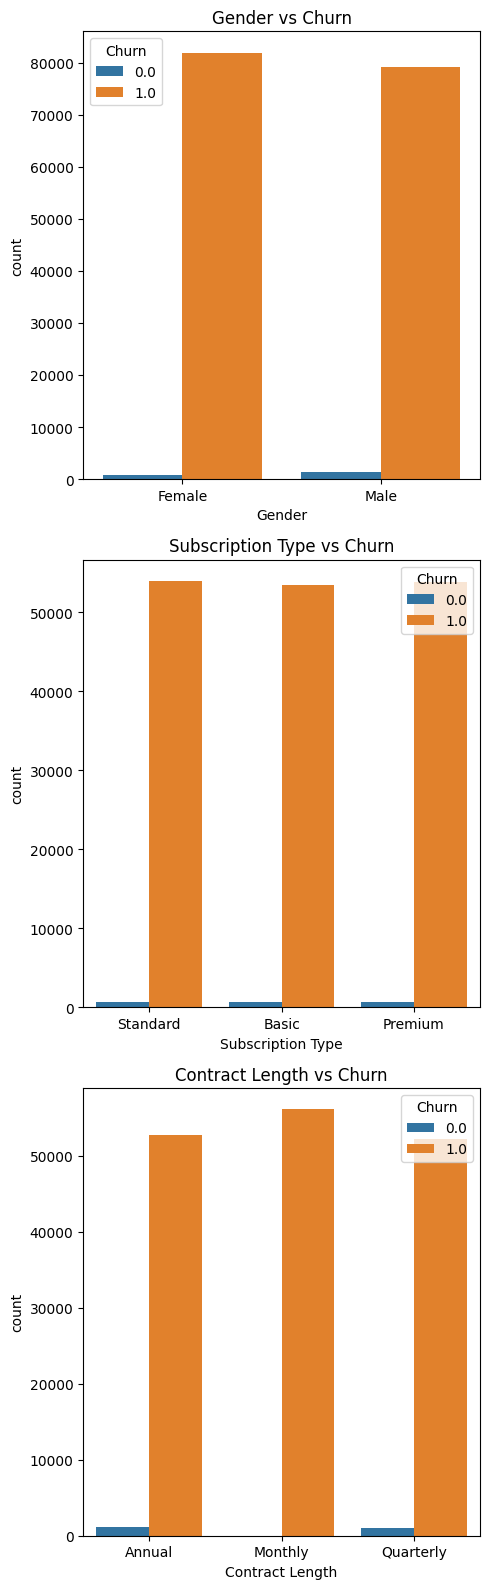

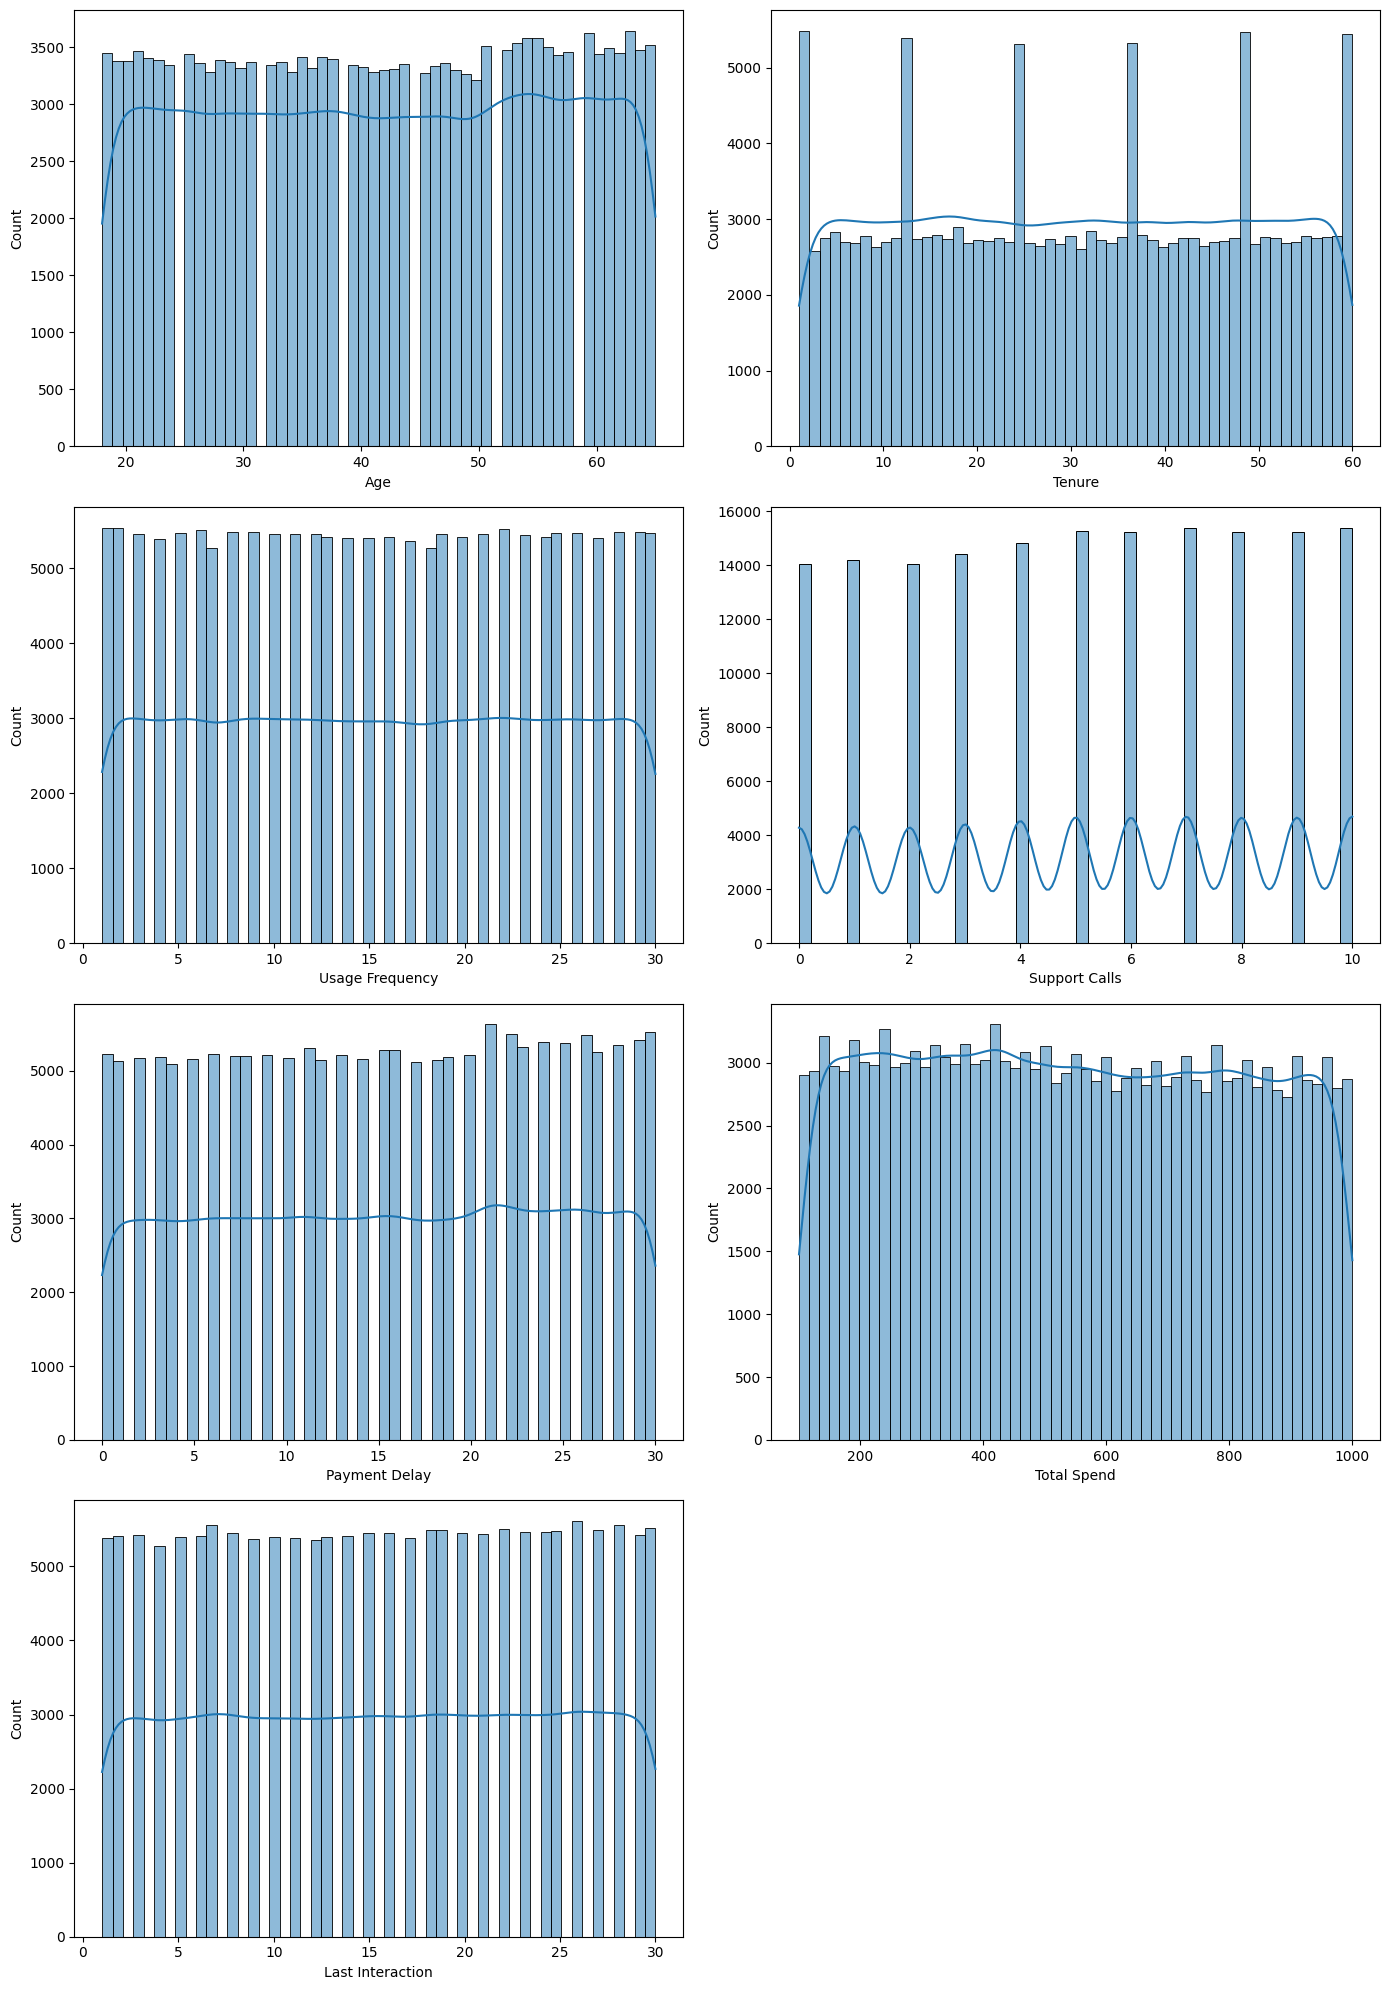

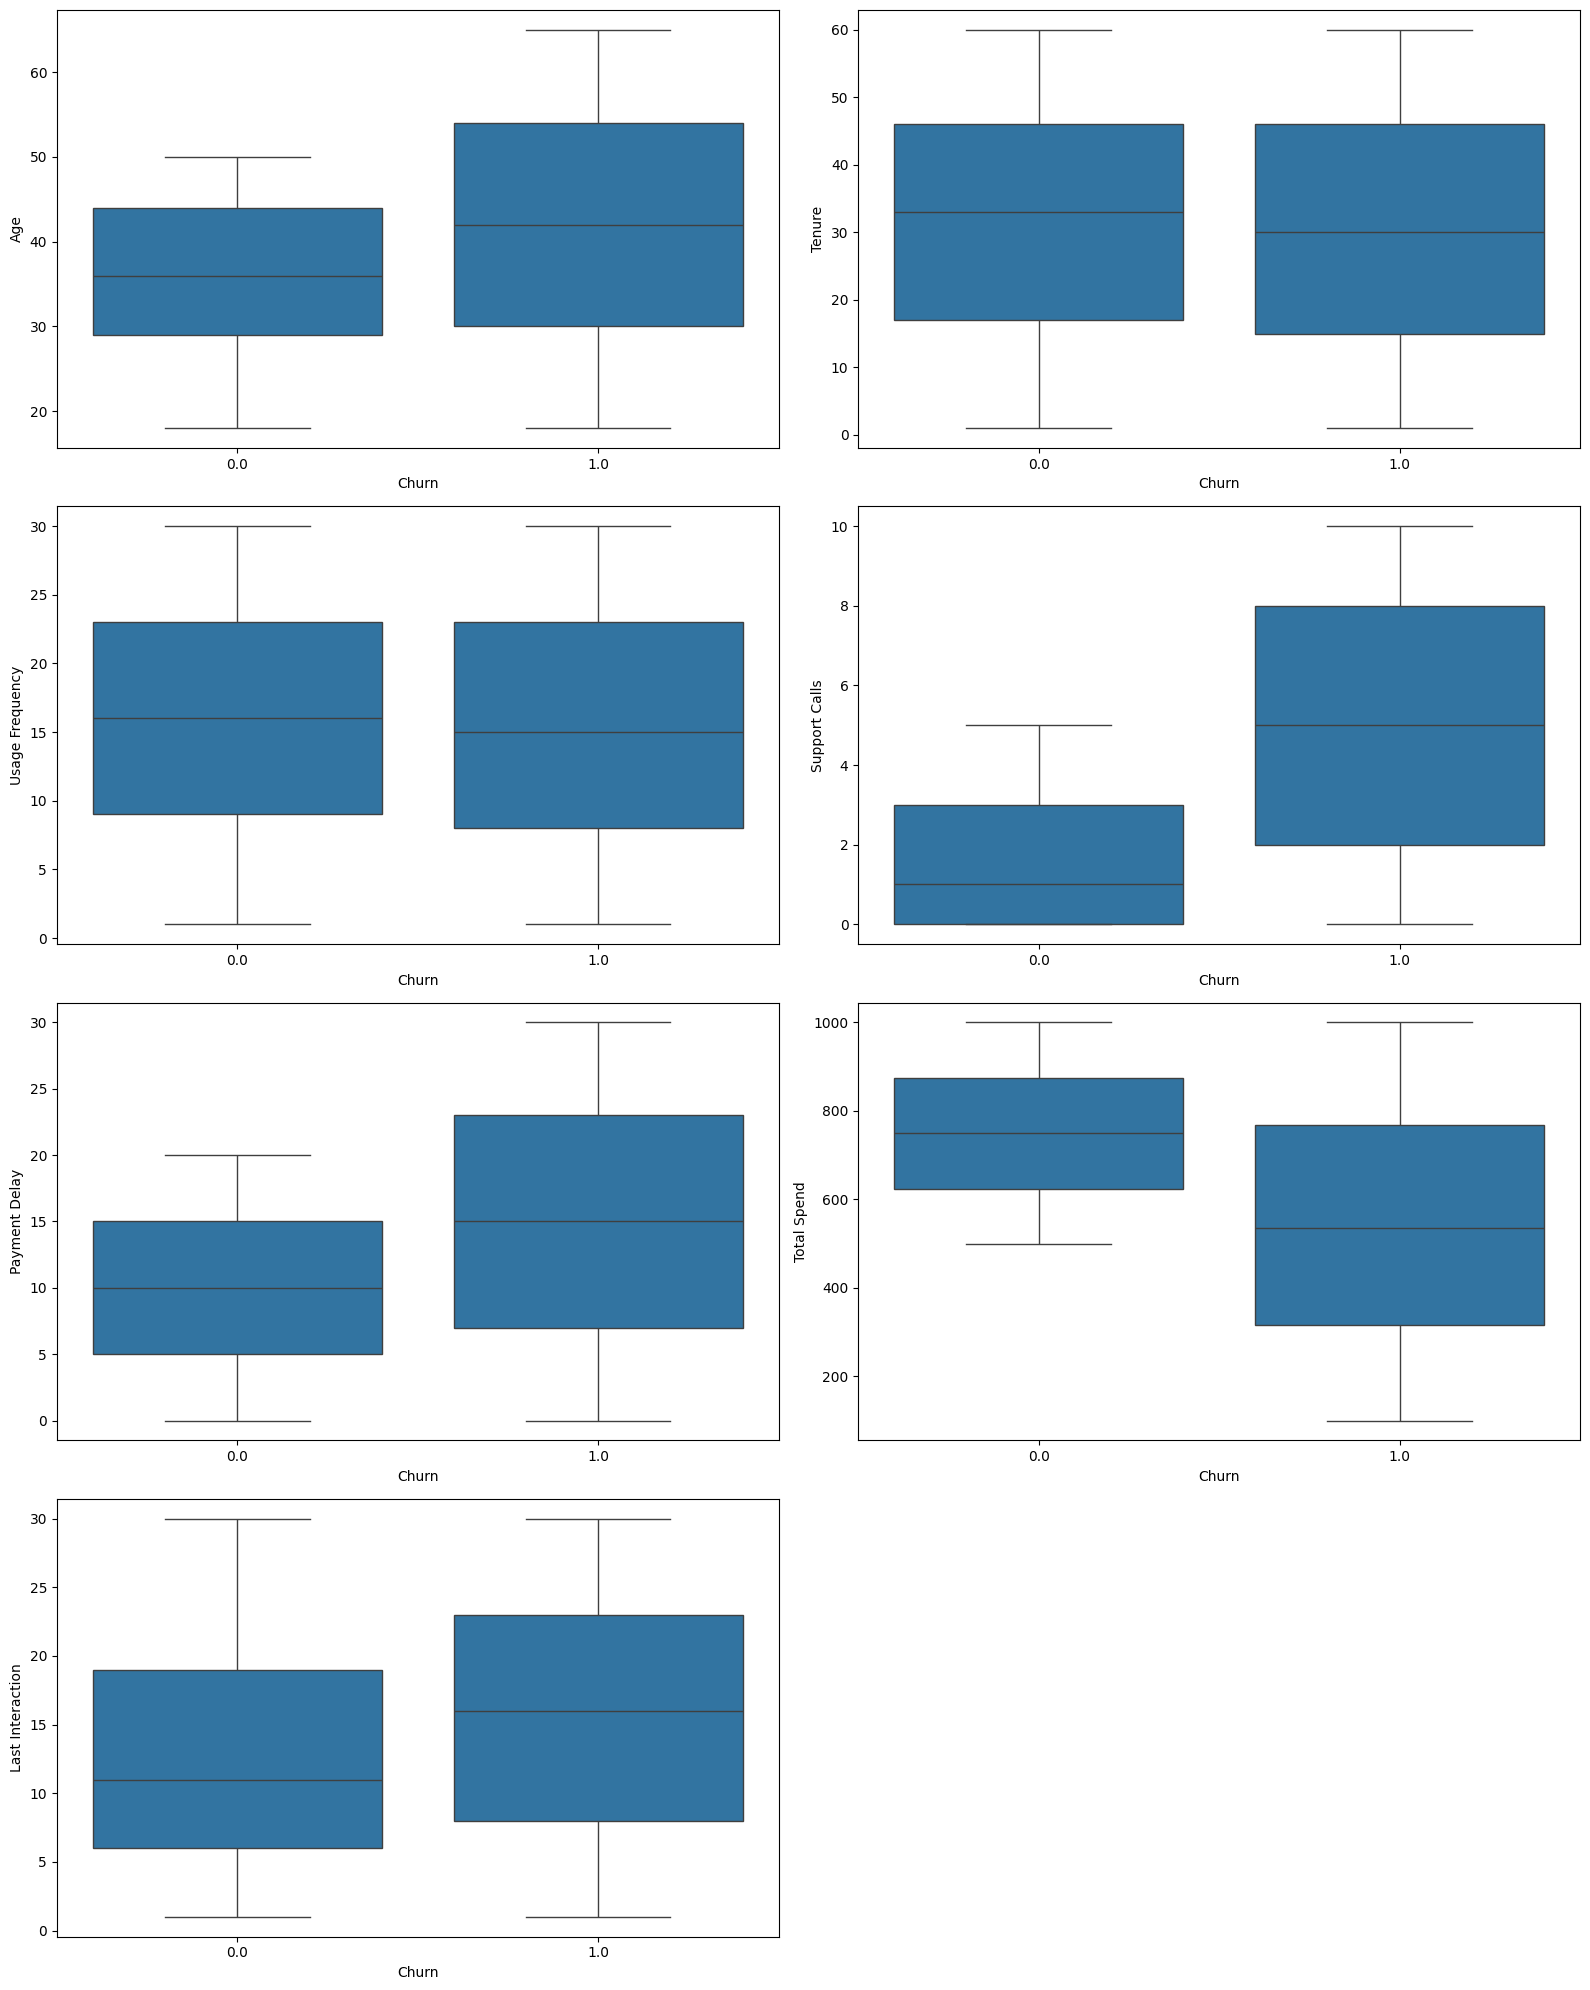

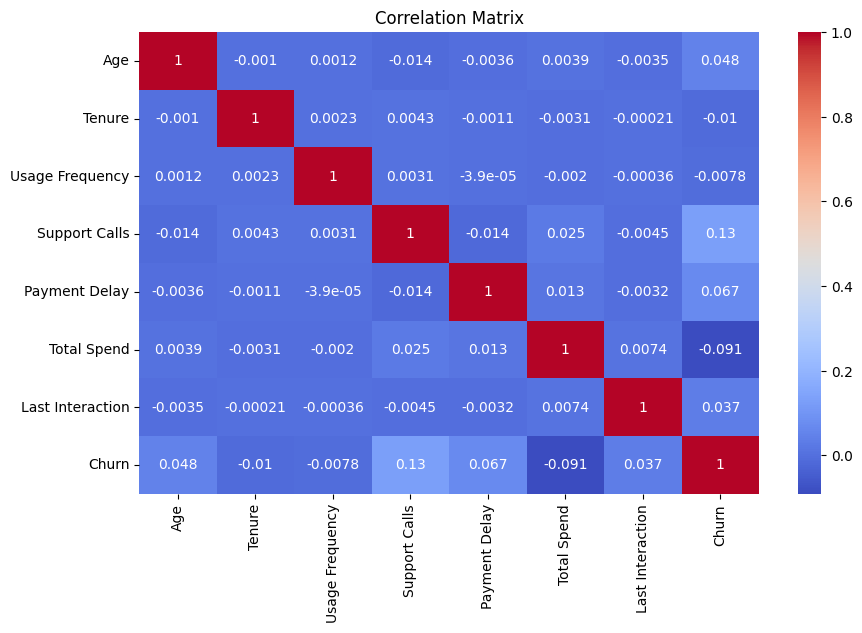

In [1]:
# 02_exploratory_data_analysis.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv")

# --------- Churn Distribution ---------
train['Churn'].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.show()

# --------- Drop customer ID ---------
train.drop("CustomerID", axis=1, inplace=True)

# --------- Categorical EDA ---------
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']

plt.figure(figsize=(5, 16))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 1, i)
    sns.countplot(data=train, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

# --------- Numeric Distributions ---------
numeric_cols = ['Age','Tenure','Usage Frequency','Support Calls',
                'Payment Delay','Total Spend','Last Interaction']

plt.figure(figsize=(14, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(train[col], kde=True)
plt.tight_layout()
plt.show()

# --------- Boxplots vs Churn ---------
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=train['Churn'], y=train[col])
plt.tight_layout()
plt.show()

# --------- Correlation ---------
plt.figure(figsize=(10, 6))
sns.heatmap(train[numeric_cols + ['Churn']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
